# Problem Statement
Implement a KNN model to classify the animals in to categorie

In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
#load the dataset
url='https://raw.githubusercontent.com/AliHumadi2000/KNN/main/Zoo.csv'
df=pd.read_csv(url)
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# rows= 101,columns 18
df.shape

(101, 18)

In [4]:
#descibe data 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [5]:
#data types 
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
# animal name is categorize 
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
# check if there is missing values of duplicate 

In [8]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
df.duplicated().sum()# no missing or duplicated values 

0

# visulization 


In [10]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


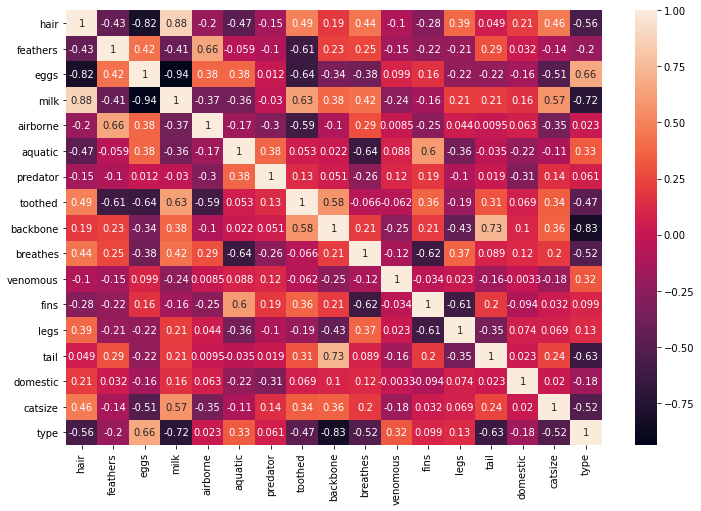

In [11]:
# correlation 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

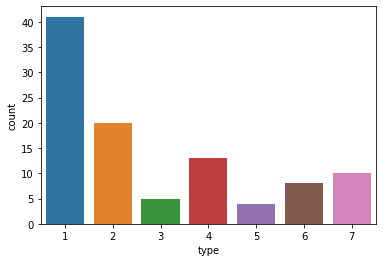

In [12]:
#plot type 
sns.countplot(df['type'])
plt.show()

In [13]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in df.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

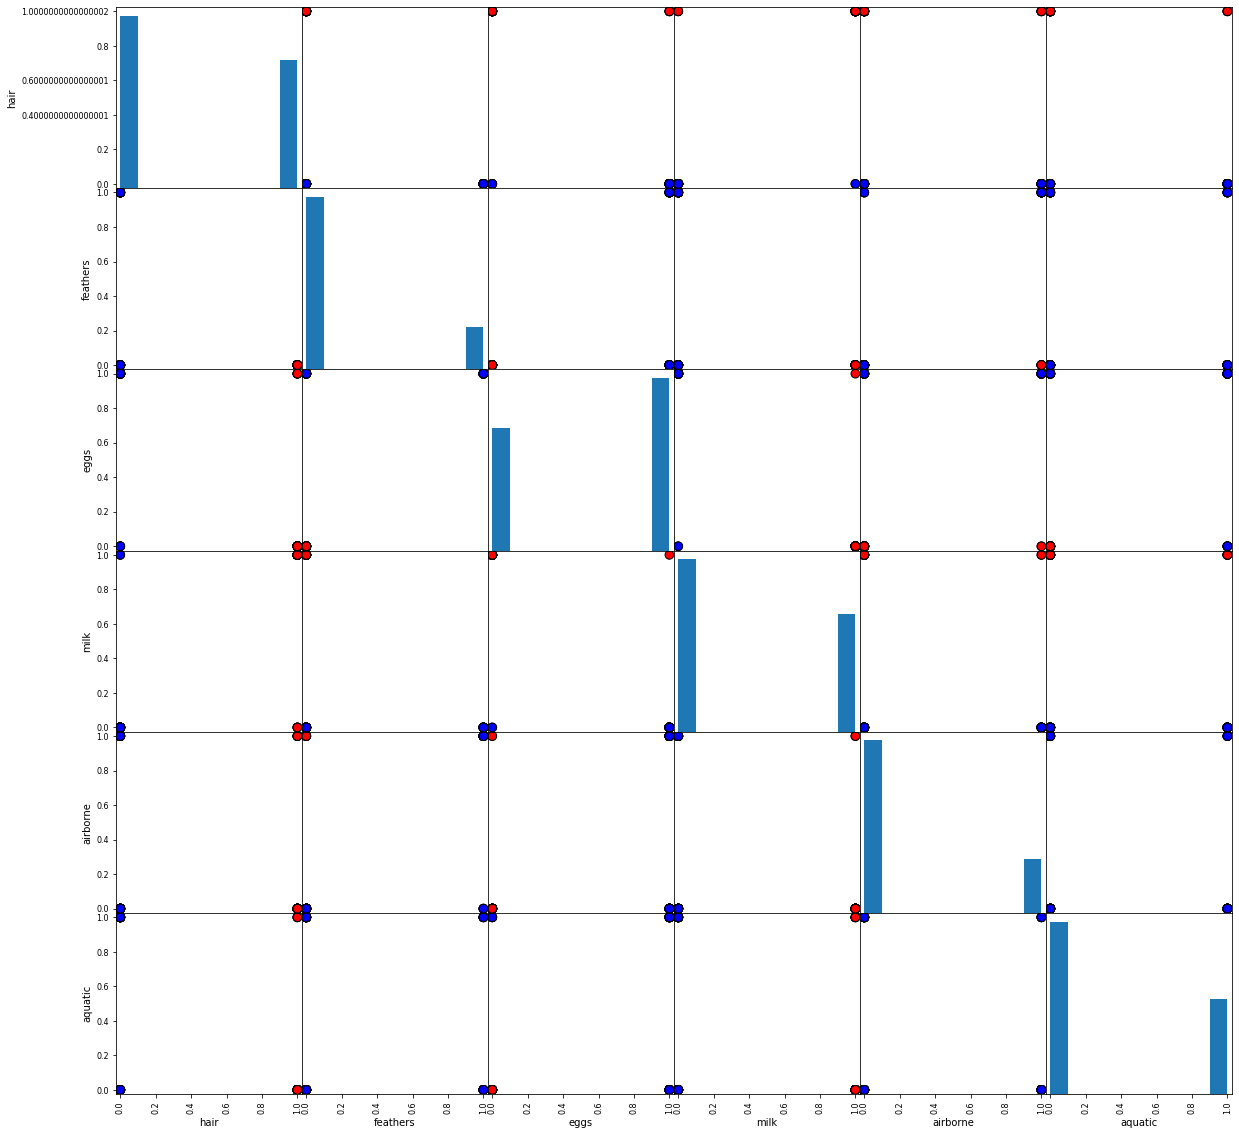

In [14]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(df.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

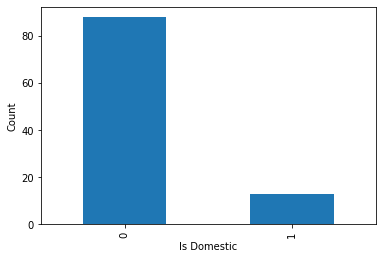

In [15]:
# Lets plot how many animals are domestic or not
df['domestic'].value_counts().plot(kind="bar")
plt.xlabel('Is Domestic')
plt.ylabel("Count")
plt.show()

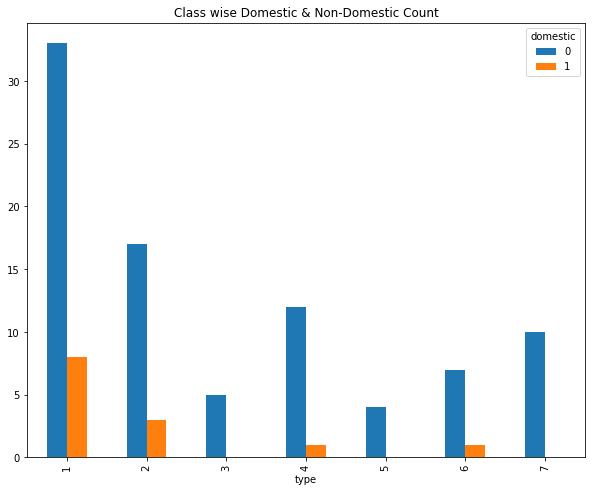

In [16]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df['type'], df['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [17]:
# Lets see how many animals provides us milk
df['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

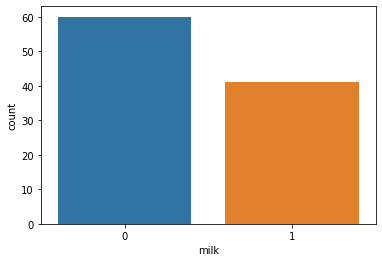

In [18]:
sns.countplot(df['milk'])
plt.show()

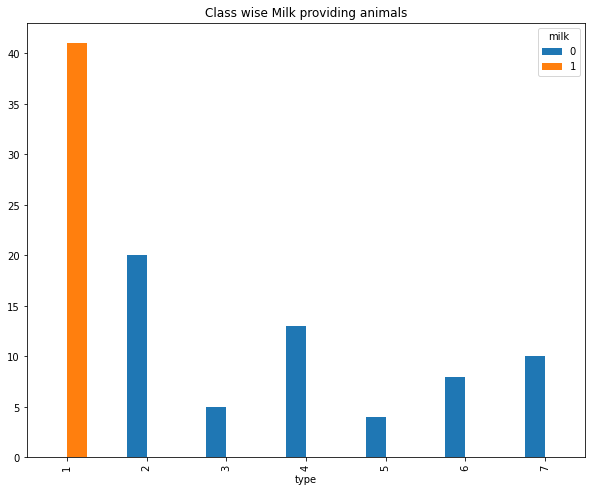

In [19]:
pd.crosstab(df['type'], df['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [20]:
#to split train and test data
# split train test data into 70/30.
X = df.iloc[:,1:16]
Y = df.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [21]:
#to find best k value
acc=[]
for i in range(1,15):
    neigh=KNN(n_neighbors=i)
    neigh.fit(X_train,Y_train)
    train_acc=neigh.predict(X_test)
    train_acc=accuracy_score(train_acc,Y_test)
    acc.append(train_acc)

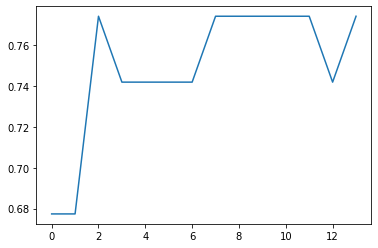

In [22]:
plt.plot(acc)
plt.show()

In [23]:
print(max(acc))
acc

0.7741935483870968


[0.6774193548387096,
 0.6774193548387096,
 0.7741935483870968,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7419354838709677,
 0.7741935483870968]

In [24]:
#build the model
model=KNN(n_neighbors=3)
model.fit(X_train,Y_train)
#prediction
y=model.predict(X_test)

In [25]:

y.shape

(31,)

In [26]:
Y_test.shape

(31,)

In [27]:
d={'Actual':Y_test,
  'Predict':y}

In [28]:
#actual and predict value 
a=pd.DataFrame(d)
a

,Actual,Predict
55,1,1
0,1,1
16,0,0
12,0,0
24,0,0
56,1,0
17,1,1
18,1,0
13,0,0
100,0,0


In [29]:
print(classification_report(Y_test,y))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.89      0.57      0.70        14

    accuracy                           0.77        31
   macro avg       0.81      0.76      0.76        31
weighted avg       0.80      0.77      0.76        31



In [30]:
print(accuracy_score(Y_test,y))

0.7741935483870968


In [31]:

print(confusion_matrix(Y_test,y))

[[16  1]
 [ 6  8]]


In [32]:
df.drop(columns='animal name',axis=1,inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [33]:
#to split train and test data
# split train test data into 70/30.
X = df.iloc[:,1:16]
Y = df.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [34]:
#build the model
model=KNN(n_neighbors=3)
model.fit(X_train,Y_train)
#prediction
y=model.predict(X_test)

In [35]:
print(classification_report(Y_test,y))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.84        31
   macro avg       0.73      0.79      0.74        31
weighted avg       0.82      0.84      0.81        31



In [36]:
print(accuracy_score(Y_test,y))


0.8387096774193549


In [37]:
print(confusion_matrix(Y_test,y))

[[11  2  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]
